# Decision Tree

## Classification

### Dataset Load - breast_cancer Dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
breast_cancer_dataset = load_breast_cancer()
X, y = breast_cancer_dataset.data, breast_cancer_dataset.target

In [4]:
print('shape of X:', X.shape)
print('shape of y', y.shape)
print('y:', y[:30])

shape of X: (569, 30)
shape of y (569,)
y: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0]


<BarContainer object of 30 artists>

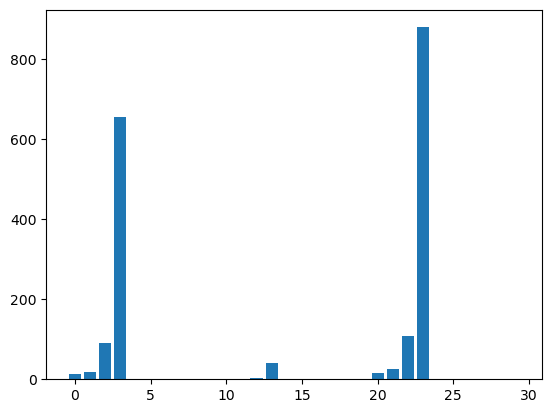

In [5]:
# 특성별 평균 막대 그래프
plt.bar(range(X.shape[1]), X.mean(axis=0))

### Data Preprocessing

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# 훈련/검증/테스트 데이터로 나누기
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state = 0)

In [8]:
# 의사결정나무 모델은 스케일에 영향을 받지 않으므로 생략

### Learning

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
# 의사결정나무 모델 학습
clf = DecisionTreeClassifier()

In [11]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

### Inference & Evaluation

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
y_train_hat = clf.predict(X_train)
print('train_accuracy: %.5f'%accuracy_score(y_train, y_train_hat))

train_accuracy: 1.00000


In [14]:
y_val_hat = clf.predict(X_val)
print('val_accuracy: %.5f'%accuracy_score(y_val, y_val_hat))

val_accuracy: 0.88112


### Hyperparameter search (min_samples_leaf)

In [15]:
# min_samples_leaf에 따른 훈련/검증 정확도 비교
train_accuracy_list =[]
val_accuracy_list = []

In [16]:
m_settings = [1, 2, 5, 7, 10, 20]

In [17]:
for m in m_settings:

    clf = DecisionTreeClassifier(min_samples_leaf = m)
    clf.fit(X_train, y_train)

    y_train_hat = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_hat)
    train_accuracy_list.append(train_accuracy)

    y_val_hat = clf.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_hat)
    val_accuracy_list.append(val_accuracy)

In [18]:
result_df = pd.DataFrame({
        'min_samples_leaf': m_settings,
    'training_accuracy': train_accuracy_list,
    'test_accuracy': val_accuracy_list
})

In [19]:
display(result_df)

,min_samples_leaf,training_accuracy,test_accuracy
0,1,1.000000,0.909091
1,2,0.992958,0.881119
2,5,0.971831,0.930070
3,7,0.964789,0.923077
4,10,0.960094,0.937063
5,20,0.931925,0.916084


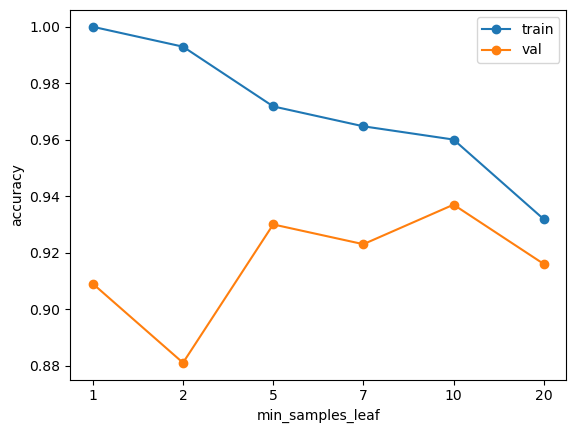

In [20]:
# min_samples_leaf에 따른 훈련/검증 정확도 비교 그래프
plt.plot(np.arange(len(m_settings)), train_accuracy_list, label='train', marker='o')
plt.plot(np.arange(len(m_settings)), val_accuracy_list, label='val', marker='o')
plt.xticks(np.arange(len(m_settings)), m_settings)
plt.xlabel('min_samples_leaf')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### sklearn 내장 함수를 활용한 Tree 시각화

In [21]:
from sklearn import tree

In [22]:
clf = DecisionTreeClassifier(min_samples_leaf=30)
clf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=30)

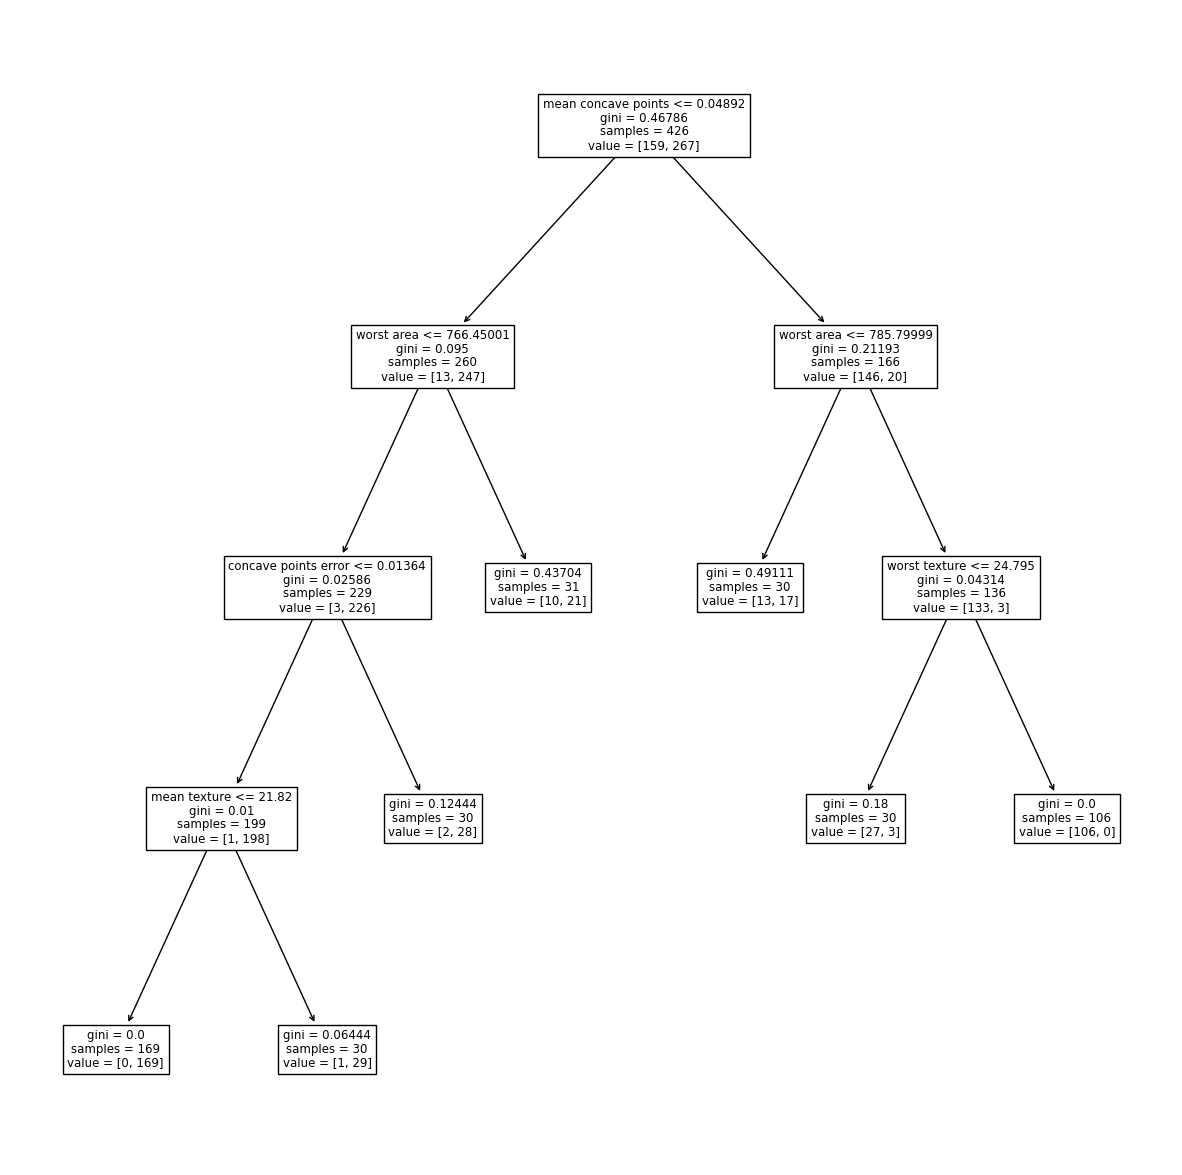

In [23]:
fig = plt.figure(figsize=(15,15))
tree.plot_tree(clf, precision=5, feature_names=breast_cancer_dataset.feature_names)
plt.show()

### Feature Importance 시각화 (Single Tree)

In [24]:
clf = DecisionTreeClassifier(min_samples_leaf=10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=10)

In [25]:
feature_names = breast_cancer_dataset.feature_names
feature_importance = clf.feature_importances_

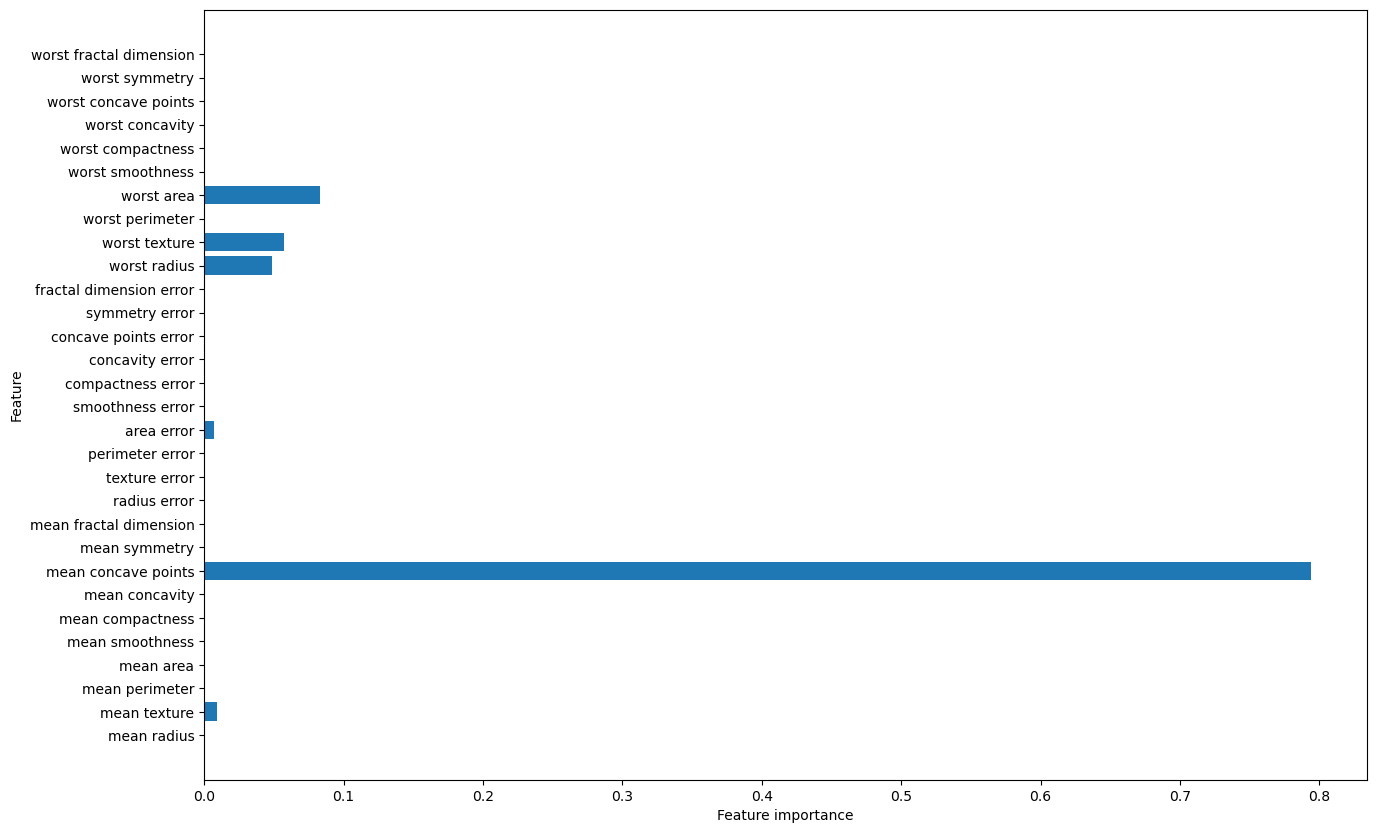

In [26]:
fig = plt.figure(figsize=(15,10))
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

# Random Forest

## Classifiaction

### Dataset Load - breast_cancer Dataset

In [27]:
breast_cancer_dataset = load_breast_cancer()
X, y = breast_cancer_dataset.data, breast_cancer_dataset.target

In [28]:
print('shape of X:', X.shape)
print('shape of y', y.shape)
print('y:', y[:30])

shape of X: (569, 30)
shape of y (569,)
y: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0]


### Data Preprocessing

In [29]:
# 훈련/검증 데이터로 나누기
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state = 0)

### Learning

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
# 랜덤포레스트 모델 학습
clf = RandomForestClassifier()

In [32]:
clf.fit(X_train, y_train)

RandomForestClassifier()

### Inference & Evaluation

In [33]:
# 훈련/검증 정확도 출력
y_train_hat = clf.predict(X_train)
print('train_accuracy: %.5f'%accuracy_score(y_train, y_train_hat))

train_accuracy: 1.00000


In [34]:
y_val_hat = clf.predict(X_val)
print('val_accuracy: %.5f'%accuracy_score(y_val, y_val_hat))

val_accuracy: 0.96503


### Hyperparameter search (n_estimators)

In [35]:
train_accuracy_list =[]
val_accuracy_list = []

In [36]:
n_settings = [1, 2, 5, 10, 20, 50, 100]

In [37]:
for n in n_settings:

    clf = RandomForestClassifier(n_estimators=n)
    clf.fit(X_train, y_train)

    y_train_hat = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_hat)
    train_accuracy_list.append(train_accuracy)
    
    y_val_hat = clf.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_hat)
    val_accuracy_list.append(val_accuracy)

In [38]:
result_df = pd.DataFrame({
        'n_estimators': n_settings,
    'training_accuracy': train_accuracy_list,
    'val_accuracy': val_accuracy_list
})

In [39]:
display(result_df)

,n_estimators,training_accuracy,val_accuracy
0,1,0.955399,0.902098
1,2,0.967136,0.923077
2,5,0.992958,0.958042
3,10,1.000000,0.951049
4,20,1.000000,0.951049
5,50,1.000000,0.965035
6,100,1.000000,0.979021


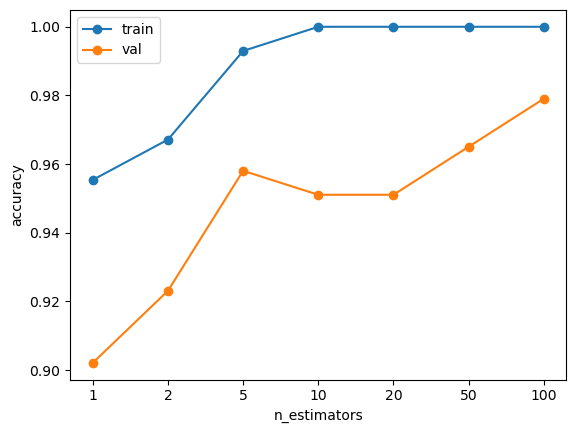

In [43]:
# n_estimators에 따른 훈련/검증 정확도 비교 그래프
plt.plot(np.arange(len(n_settings)), train_accuracy_list, label='train', marker='o')
plt.plot(np.arange(len(n_settings)), val_accuracy_list, label='val', marker='o')
plt.xticks(np.arange(len(n_settings)), n_settings)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### Feature Importance 시각화 (Random Forest)

In [40]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
feature_names = breast_cancer_dataset.feature_names
feature_importance = clf.feature_importances_

<BarContainer object of 30 artists>

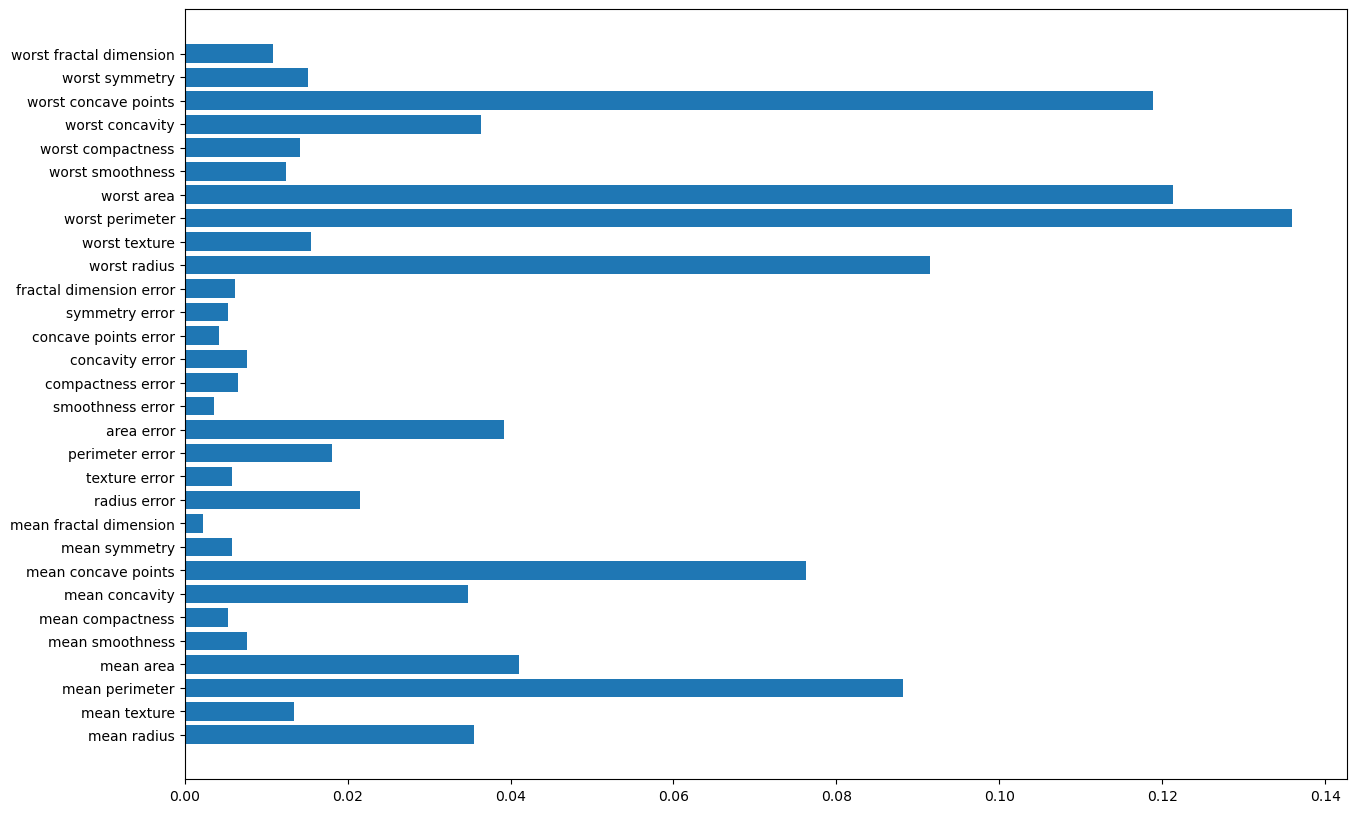

In [42]:
fig = plt.figure(figsize=(15,10))
plt.barh(feature_names, feature_importance)